# Titanic - predictive Analytics
<B> by Anja Ertlschweiger, Michael Neuböck, Julia Putz | ITM18

Goal: Predict what sort of people were likely to survive

### Structure of our Notebook:
1. import necessary libraries
2. Data retrieval
3. Data preperation for exploration
4. Data exploration
5. Data preperation for modelling
6. Modelling

## Import libraries

numpy - for mathematical calculations <br>
pandas - to read in input files <br>
matplotlib - for plotting

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data retrieval

read in test and training datasets and print them to check if it works

In [2]:
train=pd.read_csv("./input/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test=pd.read_csv("./input/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data preperation for exploration

Delete unnecessary features which have no impact on further calculations or visualizations. Therefore we use axis=1 (use 1 to delete the column, 0 to delete the row) to delete the whole column and inplace=True to replace the whole table. Check if the changes worked.

In [4]:
train.drop(["SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
test.drop(["SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S
...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,C


In the printed table above you can see that there are entries which have null values in the age column. So we are checking how often that's the case.

In [5]:
print("Number of null values in Age:", sum(train.Age.isnull()))

Number of null values in Age: 177


As 177 is such a large number, we can't just ignore that or simply delete those entries. It would have a negative impact on our results and falsify our calculations. That is why we are filtering the names of the passengers and replace them with only their titles. We do that for both of our datasets. For each title we are calculating the average age which we plot as a bar chart.

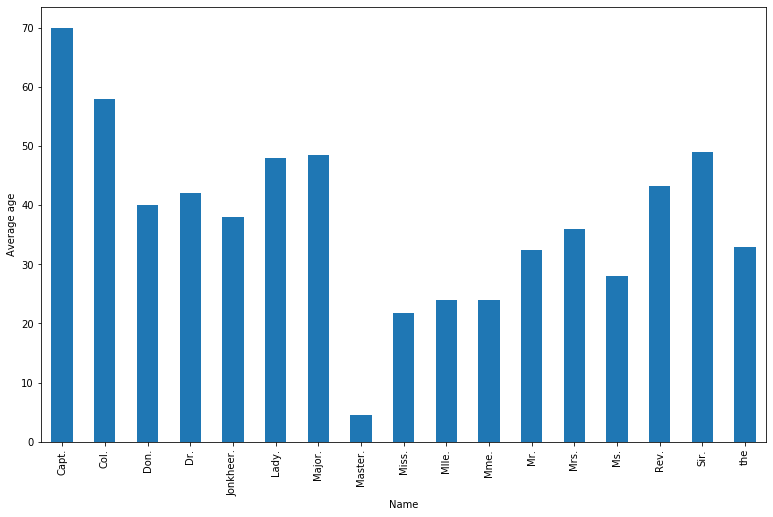

In [6]:
got = train.Name.str.split(',').str[1]
train.iloc[:,3]=pd.DataFrame(got).Name.str.split('\s+').str[1]

got_test = test.Name.str.split(',').str[1]
test.iloc[:,2]=pd.DataFrame(got_test).Name.str.split('\s+').str[1]

ax = plt.subplot()
ax.set_ylabel("Average age")
train.groupby("Name").mean()["Age"].plot(kind="bar",figsize=(13,8), ax=ax)

In [7]:
title_mean_age=[]
title_mean_age.append(list(set(train.Name)))
title_mean_age.append(train.groupby("Name").Age.mean())

title_mean_age.append(list(set(test.Name)))
title_mean_age.append(test.groupby("Name").Age.mean())

title_mean_age

[['Major.',
  'Capt.',
  'Master.',
  'Ms.',
  'Lady.',
  'Miss.',
  'Jonkheer.',
  'Mme.',
  'Dr.',
  'the',
  'Mr.',
  'Col.',
  'Mrs.',
  'Mlle.',
  'Rev.',
  'Sir.',
  'Don.'],
 Name
 Capt.        70.000000
 Col.         58.000000
 Don.         40.000000
 Dr.          42.000000
 Jonkheer.    38.000000
 Lady.        48.000000
 Major.       48.500000
 Master.       4.574167
 Miss.        21.773973
 Mlle.        24.000000
 Mme.         24.000000
 Mr.          32.368090
 Mrs.         35.898148
 Ms.          28.000000
 Rev.         43.166667
 Sir.         49.000000
 the          33.000000
 Name: Age, dtype: float64,
 ['Ms.', 'Master.', 'Miss.', 'Rev.', 'Dr.', 'Mr.', 'Mrs.', 'Col.', 'Dona.'],
 Name
 Col.       50.000000
 Dona.      39.000000
 Dr.        53.000000
 Master.     7.406471
 Miss.      21.774844
 Mr.        32.000000
 Mrs.       38.903226
 Ms.              NaN
 Rev.       35.500000
 Name: Age, dtype: float64]

Next up we are going through the whole dataset and look for the entries which have a null value in their age column. If we find one we replace the null value with the average age of the related title.

In [8]:
n_training = train.shape[0]
n_titles = len(title_mean_age[1])
for i in range(0, n_training):
    if np.isnan(train.Age[i])==True:
        for j in range(0, n_titles):
            if train.Name[i] == title_mean_age[0][j]:
                train.Age[i] = title_mean_age[1][j]
                
n_testing = test.shape[0]
n_titles = len(title_mean_age[1])
for i in range(0, n_testing):
    if np.isnan(test.Age[i])==True:
        for j in range(0, n_titles):
            if test.Name[i] == title_mean_age[0][j]:
                test.Age[i] = title_mean_age[1][j]

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
print("Number of null values in Age:", sum(train.Age.isnull()))

Number of null values in Age: 0


Now there are no more null values in the age column, so we don't need the name feature anymore and delete it.

In [10]:
train.drop(["Name"], axis=1, inplace=True)
test.drop(["Name"], axis=1, inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S
...,...,...,...,...,...,...
886,887,0,2,male,27.0,S
887,888,1,1,female,19.0,S
888,889,0,3,female,48.0,S
889,890,1,1,male,26.0,C


For further calculation and visualization we are adding the feature "Age_category" to our datesets. Therefore we are defining our cut points, to set from what age a category should start and end, and our label_names, which define how the categories should be named. Here it is important that the cut_points array contains one more value than the label_names array. The function we are defining next, adds a new feature to the input dataset. It checks which category the age belongs to and adds the correct category. Now the function only has to be called for the two of our datasets.

In [11]:
cut_points = [0, 11, 18, 60, 100]
label_names = ["child", "teenager", "adult", "senior"]

In [12]:
def process_age(df, cut_points, label_names):
    df["Age_category"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)
train

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Age_category
0,1,0,3,male,22.0,S,adult
1,2,1,1,female,38.0,C,adult
2,3,1,3,female,26.0,S,adult
3,4,1,1,female,35.0,S,adult
4,5,0,3,male,35.0,S,adult
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,S,adult
887,888,1,1,female,19.0,S,adult
888,889,0,3,female,48.0,S,adult
889,890,1,1,male,26.0,C,adult


After this cleaning and categorizing part our dataset is ready to be analyzed by us.

## Data exploration

The first passengers who were allowed to board the lifeboats were women and children who travelled first-class. Next passengers from second and in the end those from third class were rescued. Based on these facts we already had some assumptions about who was likely to survive. So we checked the dataset if we can find entries which confirm our assumptions. 

#### Comparison how many women/men survived

According to the data over 70% of the women and only about 18% of the men who were on Board survived (Plot 1). That is due to the fact that women were rescued before men. Furthermore there were way more men on Board than women, hence it is even more shocking that in the end more than twice as many women survived (Plot 2).

In [13]:
sex_pivot = train.pivot_table(index="Sex", values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


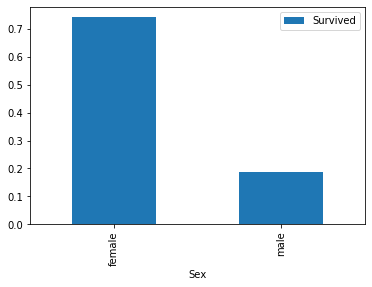

In [14]:
sex_pivot.plot.bar()
plt.show()

In [15]:
survived_sex = train[train["Survived"]==1]["Sex"].value_counts()
dead_sex = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived_sex,dead_sex])
df_sex.index = ["Survived", "Died"]
df_sex

,female,male
Survived,233,109
Died,81,468


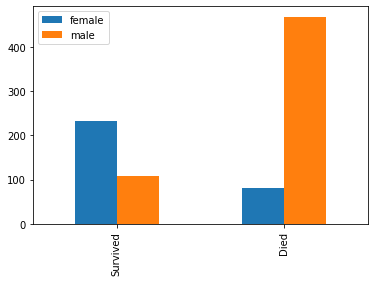

In [16]:
df_sex.plot.bar()
plt.show()

#### Comparison how many 1/2/3 class passengers survived

The following plot visualizes, that passengers who travelled first class had the biggest chance to survive. There were only few second class passengers on board, that is why such a high percentage survived. But if you compare the concrete numbers of survivors per class, they had the fewest. Most casualties were passengers from third class. Although most passengers on Board travelled third class, they had less survivors than the first class. This may sound frightening but can again be explained with the fact that first class passengers were rescued first.

In [17]:
pclass_pivot = train.pivot_table(index="Pclass", values="Survived")
pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


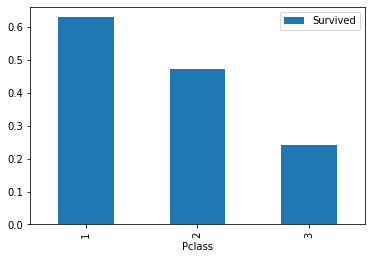

In [18]:
pclass_pivot.plot.bar()
plt.show()

In [19]:
survived_class = train[train["Survived"]==1]["Pclass"].value_counts()
dead_class = train[train["Survived"]==0]["Pclass"].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ["Survived", "Died"]

df_class

,1,2,3
Survived,136,87,119
Died,80,97,372


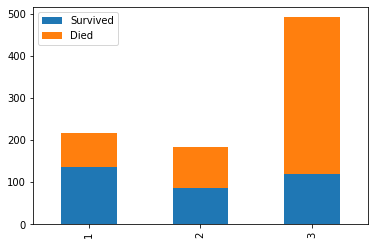

In [20]:
df_class.T.plot(kind="bar", stacked=True)
plt.show()

#### Analysis of Survivors according to their age

The first graph illustrates that most survivors were between 20 and 40 years old. However children had the biggest chance to survive. The survival rate decreases with increasing age. Since mostly adults were on Board, most of the survivors are adults as well. Except for the children, in each category less than 50% survived. At this point you can clearly see that children were among the first ones who got rescued.

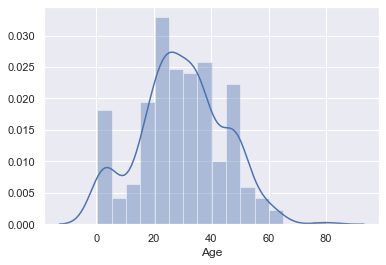

In [21]:
import seaborn as sns
sns.set()
bool_frame = train["Survived"]==1
sns.distplot(train[bool_frame]["Age"])
plt.show()

In [22]:
age_pivot = train.pivot_table(index="Age_category", values="Survived")
age_pivot

,Survived
Age_category,
child,0.573529
teenager,0.436620
adult,0.365753
senior,0.227273


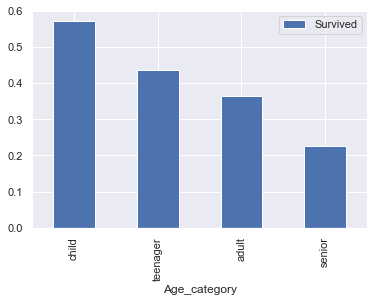

In [23]:
age_pivot.plot.bar()
plt.show()

In [24]:
survived_age = train[train["Survived"]==1]["Age_category"].value_counts()
dead_age = train[train["Survived"]==0]["Age_category"].value_counts()
df_age = pd.DataFrame([survived_age,dead_age])
df_age.index = ["Survived", "Died"]

df_age

,child,teenager,adult,senior
Survived,39,31,267,5
Died,29,40,463,17


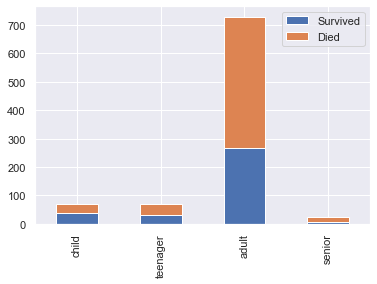

In [25]:
df_age.T.plot(kind="bar", stacked=True)
plt.show()

## Data preperation for modelling
As the preperation we did earlier was aimed to analyze the data precisely, we still have to prepare the datasets for modelling. The Models we are using cannot handle strings as entries, therefore we need to convert them into int or float values. This changes must be done in the Age_category, Sex and Embarked column.

In [26]:
age_mapping = {"child": 1, "teenager": 2, "adult": 3, "senior": 4}
train["Age_category"] = train["Age_category"].map(age_mapping)
test["Age_category"] = test["Age_category"].map(age_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Age_category
0,1,0,3,male,22.0,S,3
1,2,1,1,female,38.0,C,3
2,3,1,3,female,26.0,S,3
3,4,1,1,female,35.0,S,3
4,5,0,3,male,35.0,S,3


In [27]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Age_category
0,1,0,3,0,22.0,S,3
1,2,1,1,1,38.0,C,3
2,3,1,3,1,26.0,S,3
3,4,1,1,1,35.0,S,3
4,5,0,3,0,35.0,S,3


In [28]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Age_category
0,1,0,3,0,22.0,1.0,3
1,2,1,1,1,38.0,2.0,3
2,3,1,3,1,26.0,1.0,3
3,4,1,1,1,35.0,1.0,3
4,5,0,3,0,35.0,1.0,3


There is still the possibility that the dataset contains null values.

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null int64
Age             891 non-null float64
Embarked        889 non-null float64
Age_category    891 non-null category
dtypes: category(1), float64(2), int64(4)
memory usage: 42.9 KB


The info shows that the dataset has 891 entries per column. But at first sight you can see that there are 2 entries less in the embarked column. This means that the missing 2 are null values. As they won't have a big impact on our result (because of the small amount) we can delete them. As we want to delete the whole row which contains the null value we set axis=0. To check if the delete process worked, we use another possibility to find out how many null values our dataset contains. This way even shows the concrete number of null values, so we don't have to calculate like we did before.

In [30]:
train.dropna(axis=0, inplace=True)
train.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age             0
Embarked        0
Age_category    0
dtype: int64

The training dataset has to be split in X and y. The y_train dataset should only contain the feature survived that it can be compared with the prediction made using the X_train dataset later on. That is how the algorithms accuracy can be determined.

In [31]:
y_train=train.Survived
X_train=train
X_train.drop(["Survived"], axis=1, inplace=True)

After these steps the dataset is clean, which means it only contains features which are necessary for calculation and no more null values. It is ready for modelling.

## Modelling

A model is trained to predict wheter a person survives or not. Therefore we use a linear model as well as two other model types to compare their accuracy.

#### lineares Modell

In [32]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression(penalty='l2',random_state = 0)
linear.fit(X=X_train, y=y_train)

predictions = linear.predict(test)

In [33]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = linear, X=X_train , y=y_train , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")
print(predictions)

Logistic Regression:
 Accuracy: 0.7986721144024516 +/- 0.0256806947090098 

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


#### K-NN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors = 9, metric ="minkowski", p = 2)
neighbor.fit(X=X_train, y=y_train)

predictions = neighbor.predict(test)

In [35]:
accuracies = cross_val_score(estimator = neighbor, X=X_train, y=y_train, cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")
print(predictions)

K-NN:
 Accuracy: 0.45686925434116443 +/- 0.08521450459652706 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 0)
randomforest.fit(X=X_train, y=y_train)

predictions = randomforest.predict(test)

In [37]:
accuracies = cross_val_score(estimator = randomforest, X=X_train, y=y_train, cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")
print(predictions)

Random Forest:
 Accuracy: 0.7975357507660878 +/- 0.017994101790387657 

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]


#### Submission

For our submission we used the Random Forest model because we got the highest accuaracy with that one.

In [38]:
passenger_ids = test['PassengerId']
predictions = randomforest.predict(test)

In [39]:
test = test.drop('PassengerId', axis=1)

In [40]:
output = pd.DataFrame({ 'PassengerId' : passenger_ids, 'Survived' : predictions })
output.to_csv('submission.csv', index=False)